## efficientnet model for chest x-ray images

In [6]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
from tqdm import tqdm
import json
from pathlib import Path
from PNModel import ChestXRayDataset, ChestXRayModel, TrainingConfig, train_model, plot_training_history, create_data_loaders

# Set random seed for reproducibility
torch.manual_seed(123)
np.random.seed(123)


# Generate data paths with labels
data_dir = '../chest_xray/train'

filepaths = []
labels = []

valid_dir = '../chest_xray/val'
test_dir = '../chest_xray/test'

valid_filepaths = []
valid_labels = []

test_filepaths = []
test_labels = []


# Data loading functions
def get_data(data_dir):
    filepaths = []
    labels = []
    folds = os.listdir(data_dir)
    for fold in folds:
        foldpath = os.path.join(data_dir, fold)
        filelist = os.listdir(foldpath)
        for file in filelist:
            fpath = os.path.join(foldpath, file)
            filepaths.append(fpath)
            labels.append(fold)
    return filepaths, labels

filepaths, labels = get_data(data_dir)
valid_filepaths, valid_labels = get_data(valid_dir)
test_filepaths, test_labels = get_data(test_dir)

# Create dataframe
df = pd.DataFrame({
    'filepaths': filepaths,
    'labels': labels
})

# load train data
train_df = pd.DataFrame({ 'filepaths': filepaths, 'labels': labels })
valid_df = pd.DataFrame({ 'filepaths': valid_filepaths, 'labels': valid_labels })
test_df = pd.DataFrame({ 'filepaths': test_filepaths, 'labels': test_labels })
# Main execution
if __name__ == "__main__":
    # ... (Previous data loading code remains the same) ...
    
    models_to_try = [
        # TrainingConfig('efficientnet_b0', batch_size=16),
        TrainingConfig('efficientnet_b0', batch_size=16, num_epochs=10),
    ]
    
    # Train and evaluate each model
    results = {}
    for config in models_to_try:
        print(f"\nTraining {config.model_name}...")
        model, test_acc, history = train_model(config, train_df, valid_df, test_df)
        results[config.model_name] = {
            'test_acc': test_acc,
            'history': history
        }
        
        # Plot and save training history
        plt = plot_training_history(history)
        plt.savefig(config.checkpoint_dir / 'training_history.png')
        plt.close()
    
    # Print final results
    print("\nFinal Results:")
    for model_name, result in results.items():
        print(f"{model_name}: {result['test_acc']:.2f}%")

c:\ProgramData\mne-python\1.5.1_0\envs\CU121\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\ProgramData\mne-python\1.5.1_0\envs\CU121\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Training efficientnet_b0...
Training efficientnet_b0 for 10 epochs...

Epoch 1/10


Train Loss: 0.1605, Train Acc: 93.42%
Val Loss: 0.4586, Val Acc: 75.00%
New best model saved! Validation Accuracy: 75.00%

Epoch 2/10


Train Loss: 0.1056, Train Acc: 96.38%
Val Loss: 0.2607, Val Acc: 93.75%
New best model saved! Validation Accuracy: 93.75%

Epoch 3/10


Train Loss: 0.0873, Train Acc: 96.72%
Val Loss: 0.2831, Val Acc: 87.50%

Epoch 4/10


Train Loss: 0.0732, Train Acc: 97.64%
Val Loss: 0.1444, Val Acc: 100.00%
New best model saved! Validation Accuracy: 100.00%

Epoch 5/10


Train Loss: 0.0665, Train Acc: 97.93%
Val Loss: 0.0934, Val Acc: 100.00%

Epoch 6/10


Train Loss: 0.0566, Train Acc: 97.97%
Val Loss: 0.0857, Val Acc: 100.00%

Epoch 7/10


Train Loss: 0.0503, Train Acc: 98.22%
Val Loss: 0.3427, Val Acc: 75.00%

Epoch 8/10


Train Loss: 0.0432, Train Acc: 98.41%
Val Loss: 0.0361, Val Acc: 100.00%

Epoch 9/10


Train Loss: 0.0426, Train Acc: 98.62%
Val Loss: 0.1713, Val Acc: 87.50%

Epoch 10/10


Train Loss: 0.0348, Train Acc: 98.85%
Val Loss: 0.0595, Val Acc: 100.00%


d:\Projects\pneumonia\pneumonia_web\PNModel.py:249: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_checkpoint = torch.load(config.checkpoint_dir / 'best_model.pth')



Evaluating best model on test set...


Test Accuracy: 94.55%

Generating classification report...


Processing test data: 100%|██████████| 39/39 [00:07<00:00,  5.44it/s]



Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.92      0.94      0.93       234
   PNEUMONIA       0.96      0.95      0.96       390

    accuracy                           0.95       624
   macro avg       0.94      0.94      0.94       624
weighted avg       0.95      0.95      0.95       624


Final Results:
efficientnet_b0: 94.55%


## test performance of efficientnet model on chest x-ray images

In [7]:
import os
import torch
import pandas as pd
import numpy as np
from pathlib import Path
from tqdm import tqdm
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from PNModel import ChestXRayModel, create_data_loaders, get_data

def calculate_specificity(y_true, y_pred):
    """Calculate specificity (true negative rate)"""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

def evaluate_model(model, test_loader, device):
    """Evaluate model performance on test dataset"""
    model.eval()
    all_preds = []
    all_labels = []
    all_probs = []  # For AUC calculation
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probabilities = torch.softmax(outputs, dim=1)
            _, predicted = outputs.max(1)
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probabilities[:, 1].cpu().numpy())  # Probability of positive class
            cm = confusion_matrix(all_labels, all_preds)
            
    
    # Calculate metrics
    metrics = {
        'accuracy': accuracy_score(all_labels, all_preds),
        'precision': precision_score(all_labels, all_preds, average='weighted'),
        'recall': recall_score(all_labels, all_preds, average='weighted'),
        'specificity': calculate_specificity(all_labels, all_preds),
        'f1': f1_score(all_labels, all_preds, average='weighted'),
        'auc': roc_auc_score(all_labels, all_probs),
        'cm': cm,
        'all_preds': all_preds,
        'all_labels': all_labels
    }
    
    return metrics

def evaluate_all_epochs(model_name, checkpoint_dir, test_loader):
    """Evaluate models from all epochs"""
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    results = []
    
    # Initialize model
    model = ChestXRayModel(model_name=model_name).to(device)
    
    # Get all checkpoint files
    checkpoint_files = sorted(
        [f for f in os.listdir(checkpoint_dir) if f.startswith('epoch_') and f.endswith('.pth')],
        key=lambda x: int(x.split('_')[1].split('.')[0])
    )
    
    print(f"\nEvaluating {model_name} checkpoints...")
    for checkpoint_file in tqdm(checkpoint_files):
        epoch_num = int(checkpoint_file.split('_')[1].split('.')[0])
        
        # Load checkpoint
        checkpoint_path = os.path.join(checkpoint_dir, checkpoint_file)
        checkpoint = torch.load(checkpoint_path)
        model.load_state_dict(checkpoint['model_state_dict'])
        
        # Evaluate model
        metrics = evaluate_model(model, test_loader, device)

        # plot confusion matrix
        cm = metrics['cm']
        plt.figure(figsize=(5, 5))
        
        plt.rcParams.update({'font.size': 18})  # Set base font size
        sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
                    xticklabels=['Normal', 'Pneumonia'],
                    yticklabels=['Normal', 'Pneumonia'],
                    annot_kws={'size': 18})
        plt.xlabel('Prediction', fontsize=18)
        plt.ylabel('Truth', fontsize=18)
        # plt.title(f'{'Confusion Matrix'
        plt.tight_layout()
        plt.savefig(f'../checkpoints/{model_name}/epoch_{epoch_num}_confusion_matrix.png')
        plt.close()
        
        # plot ROC curve
        fpr, tpr, _ = roc_curve(metrics['all_labels'], metrics['all_preds'])
        plt.figure(figsize=(4, 4))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} - Epoch {epoch_num} ROC Curve')
        plt.legend(loc='lower right')
        plt.tight_layout()
        plt.savefig(f'../checkpoints/{model_name}/epoch_{epoch_num}_roc_curve.png')
        plt.close()

        # Store results
        results.append({
            'model_name': model_name,
            'epoch': epoch_num,
            'train_loss': checkpoint['train_loss'],
            'train_acc': checkpoint['train_acc'],
            'val_loss': checkpoint['val_loss'],
            'val_acc': checkpoint['val_acc'],
            'test_acc': metrics['accuracy'] * 100,
            'test_precision': metrics['precision'] * 100,
            'test_recall': metrics['recall'] * 100,
            'test_specificity': metrics['specificity'] * 100,
            'test_f1': metrics['f1'] * 100,
            'test_auc': metrics['auc'] * 100
        })
    
    return pd.DataFrame(results)

def plot_epoch_metrics(df, model_name):
    """Plot metrics across epochs"""
    plt.figure(figsize=(15, 10))
    
    # Plot accuracies
    plt.subplot(2, 2, 1)
    plt.plot(df['epoch'], df['train_acc'], label='Train')
    plt.plot(df['epoch'], df['val_acc'], label='Validation')
    plt.plot(df['epoch'], df['test_acc'], label='Test')
    plt.title(f'{model_name} - Accuracy Across Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    
    # Plot test classification metrics
    plt.subplot(2, 2, 2)
    plt.plot(df['epoch'], df['test_precision'], label='Precision')
    plt.plot(df['epoch'], df['test_recall'], label='Recall')
    plt.plot(df['epoch'], df['test_specificity'], label='Specificity')
    plt.plot(df['epoch'], df['test_f1'], label='F1')
    plt.title(f'{model_name} - Test Classification Metrics')
    plt.xlabel('Epoch')
    plt.ylabel('Score (%)')
    plt.legend()
    
    # Plot losses
    plt.subplot(2, 2, 3)
    plt.plot(df['epoch'], df['train_loss'], label='Train')
    plt.plot(df['epoch'], df['val_loss'], label='Validation')
    plt.title(f'{model_name} - Loss Across Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot AUC
    plt.subplot(2, 2, 4)
    plt.plot(df['epoch'], df['test_auc'], label='AUC')
    plt.title(f'{model_name} - AUC Score')
    plt.xlabel('Epoch')
    plt.ylabel('AUC (%)')
    plt.legend()
    
    plt.tight_layout()
    return plt

def create_metrics_heatmap(df, model_name):
    """Create heatmap of metrics evolution"""
    metrics = ['test_acc', 'test_precision', 'test_recall', 
              'test_specificity', 'test_f1', 'test_auc']
    
    # Create matrix for heatmap
    metrics_data = df[metrics].values.T
    
    plt.figure(figsize=(12, 6))
    sns.heatmap(metrics_data, 
                xticklabels=df['epoch'],
                yticklabels=[m.replace('test_', '').upper() for m in metrics],
                cmap='YlOrRd',
                annot=True,
                fmt='.1f',
                cbar_kws={'label': 'Score (%)'})
    
    plt.title(f'{model_name} - Metrics Evolution Across Epochs')
    plt.xlabel('Epoch')
    plt.tight_layout()
    return plt

def main():
    # Load test dataset (same as before)
    data_dir = '../chest_xray/train'
    valid_dir = '../chest_xray/val'
    test_dir = '../chest_xray/test'

    filepaths, labels = get_data(data_dir)
    valid_filepaths, valid_labels = get_data(valid_dir)
    test_filepaths, test_labels = get_data(test_dir)

    train_df = pd.DataFrame({'filepaths': filepaths, 'labels': labels})
    valid_df = pd.DataFrame({'filepaths': valid_filepaths, 'labels': valid_labels})
    test_df = pd.DataFrame({'filepaths': test_filepaths, 'labels': test_labels})

    models_to_evaluate = [
        'efficientnet_b0',
        # 'efficientnet_b4'
    ]

    all_results = []
    
    for model_name in models_to_evaluate:
        # Initialize model to get input size
        temp_model = ChestXRayModel(model_name=model_name)
        input_size = temp_model.get_input_size()
        
        # Create test loader
        _, _, test_loader, _ = create_data_loaders(
            train_df, valid_df, test_df, 
            input_size=input_size,
            batch_size=16
        )
        
        # Evaluate all epochs
        checkpoint_dir = f'../checkpoints/{model_name}'
        results_df = evaluate_all_epochs(model_name, checkpoint_dir, test_loader)
        
        # Generate and save plots
        plt = plot_epoch_metrics(results_df, model_name)
        plt.savefig(f'../checkpoints/{model_name}/epoch_evaluation.png')
        plt.close()
        
        # Generate and save heatmap
        plt = create_metrics_heatmap(results_df, model_name)
        plt.savefig(f'../checkpoints/{model_name}/metrics_heatmap.png')
        plt.close()
        
        # Save results to CSV
        results_df.to_csv(f'../checkpoints/{model_name}/epoch_evaluation.csv', index=False)
        
        all_results.append(results_df)
        
        # Print best epoch
        best_epoch = results_df.loc[results_df['test_acc'].idxmax()]
        print(f"\nBest epoch for {model_name}:")
        print(f"Epoch: {best_epoch['epoch']}")
        print(f"Test Accuracy: {best_epoch['test_acc']:.2f}%")
        print(f"Test AUC: {best_epoch['test_auc']:.2f}%")
        print(f"Test Specificity: {best_epoch['test_specificity']:.2f}%")
        print(f"Test F1-Score: {best_epoch['test_f1']:.2f}%")
    
    # Combine all results
    final_results = pd.concat(all_results, ignore_index=True)
    
    # Save combined results
    final_results.to_csv('../checkpoints/all_models_evaluation.csv', index=False)
    
    return final_results

if __name__ == "__main__":
    results = main()
    
    # Display summary statistics
    print("\nSummary Statistics:")
    metrics = ['test_acc', 'test_auc', 'test_specificity', 
              'test_precision', 'test_recall', 'test_f1']
    
    summary = results.groupby('model_name')[metrics].agg(['max', 'mean', 'std']).round(2)
    print(summary)
    
    # Save detailed summary
    summary.to_csv('model_summary_statistics.csv')

c:\ProgramData\mne-python\1.5.1_0\envs\CU121\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\ProgramData\mne-python\1.5.1_0\envs\CU121\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Evaluating efficientnet_b0 checkpoints...


  0%|          | 0/10 [00:00<?, ?it/s]C:\Users\tcs\AppData\Local\Temp\ipykernel_24636\725163628.py:74: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(


Best epoch for efficientnet_b0:
Epoch: 4
Test Accuracy: 94.55%
Test AUC: 98.38%
Test Specificity: 94.02%
Test F1-Score: 94.56%

Summary Statistics:
                test_acc              test_auc              test_specificity  \
                     max   mean   std      max   mean   std              max   
model_name                                                                     
efficientnet_b0    94.55  90.93  3.28    98.59  97.58  0.88            94.02   

                              test_precision              test_recall         \
                  mean    std            max   mean   std         max   mean   
model_name                                                                     
efficientnet_b0  81.11  10.46           94.6  91.44  2.59       94.55  90.93   

                      test_f1               
                  std     max   mean   std  
model_name                                  
efficientnet_b0  3.28   94.56  90.69  3.61  


## ROC curve for efficientnet model on chest x-ray images

c:\ProgramData\mne-python\1.5.1_0\envs\CU121\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\ProgramData\mne-python\1.5.1_0\envs\CU121\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\tcs\AppData\Local\Temp\ipykernel_24636\498753278.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See

ROC AUC Score: 0.9838


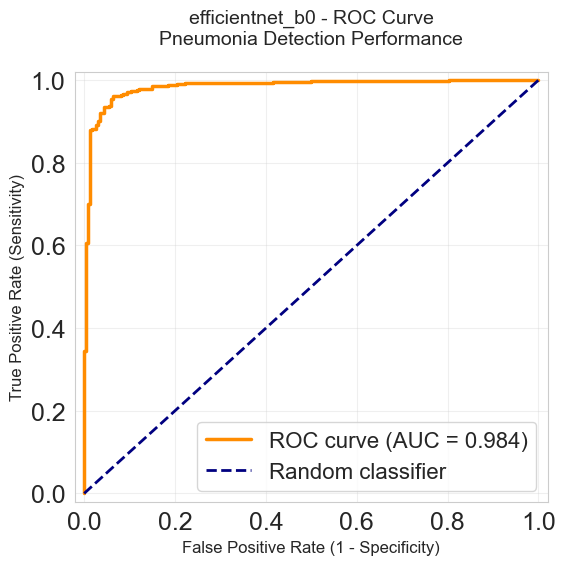

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from PNModel import ChestXRayModel, create_data_loaders

def plot_roc_curve_epoch4(model_name, checkpoint_path, test_loader, save_path):
    """
    Plot detailed ROC curve for epoch  model
    """
    # Set up device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # Initialize model
    model = ChestXRayModel(model_name=model_name).to(device)
    
    # Load epoch 4 checkpoint
    checkpoint = torch.load(checkpoint_path, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()
    
    # Collect predictions
    all_probs = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probabilities = torch.softmax(outputs, dim=1)
            
            all_probs.extend(probabilities[:, 1].cpu().numpy())  # Probability of positive class
            all_labels.extend(labels.cpu().numpy())
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
    roc_auc = auc(fpr, tpr)
    
    # Create detailed plot
    plt.figure(figsize=(6, 6))
    
    # Style setup
    sns.set_style('whitegrid')
    plt.plot(fpr, tpr, color='darkorange', lw=2.5, 
            label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
            label='Random classifier')
    
    # Add details
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
    plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
    plt.title(f'{model_name} - ROC Curve\nPneumonia Detection Performance', 
              fontsize=14, pad=20)
    
    # Add grid and legend
    plt.grid(True, alpha=0.3)
    plt.legend(loc='lower right', fontsize=16)
    
    # Add operating points annotations
    # Find some interesting threshold points
    thresholds_of_interest = [0.3, 0.5, 0.7]
    for threshold in thresholds_of_interest:
        idx = (np.abs(thresholds - threshold)).argmin()
        # plt.plot(fpr[idx], tpr[idx], 'o', markersize=8)
        # plt.annotate(f'threshold={threshold:.1f}\nFPR={fpr[idx]:.2f}, TPR={tpr[idx]:.2f}',
        #             (fpr[idx], tpr[idx]), 
        #             xytext=(10, 10), textcoords='offset points',
        #             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        #             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))
    
    # Add performance metrics text box
    textstr = f'Model Performance:\n' \
             f'AUC: {roc_auc:.3f}\n' \
            #  f'Accuracy: {checkpoint["val_acc"]:.1f}%\n' \
            #  f'Training Loss: {checkpoint["train_loss"]:.3f}'
    
    # plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
    #         fontsize=10, verticalalignment='top',
    #         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Save the plot
    plt.tight_layout()
    plt.savefig(save_path)
    
    return roc_auc

# Example usage:
if __name__ == "__main__":
    # Load your test dataset and create test_loader
    data_dir = '../chest_xray/train'
    valid_dir = '../chest_xray/val'
    test_dir = '../chest_xray/test'

    filepaths, labels = get_data(data_dir)
    valid_filepaths, valid_labels = get_data(valid_dir)
    test_filepaths, test_labels = get_data(test_dir)

    train_df = pd.DataFrame({'filepaths': filepaths, 'labels': labels})
    valid_df = pd.DataFrame({'filepaths': valid_filepaths, 'labels': valid_labels})
    test_df = pd.DataFrame({'filepaths': test_filepaths, 'labels': test_labels})

    # Initialize model and create test loader
    model_name = 'efficientnet_b0'
    temp_model = ChestXRayModel(model_name=model_name)
    input_size = temp_model.get_input_size()
    
    _, _, test_loader, _ = create_data_loaders(
        train_df, valid_df, test_df, 
        input_size=input_size,
        batch_size=16
    )
    
    # Plot ROC curve
    checkpoint_path = f'../checkpoints/{model_name}/epoch_4.pth'
    save_path = f'../roc_curve_epoch4_{model_name}.png'
    
    roc_auc = plot_roc_curve_epoch4(model_name, checkpoint_path, test_loader, save_path)
    print(f"ROC AUC Score: {roc_auc:.4f}")

## Autoencoder for chest x-ray images

Validating: 100%|██████████| 1/1 [00:00<00:00,  7.53it/s]


Epoch 1: Train Loss = 0.0165, Valid Loss = 0.0083


Validating: 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]


Epoch 2: Train Loss = 0.0064, Valid Loss = 0.0048


Validating: 100%|██████████| 1/1 [00:00<00:00,  6.81it/s]


Epoch 3: Train Loss = 0.0050, Valid Loss = 0.0041


Validating: 100%|██████████| 1/1 [00:00<00:00,  6.99it/s]


Epoch 4: Train Loss = 0.0044, Valid Loss = 0.0037


Validating: 100%|██████████| 1/1 [00:00<00:00,  6.80it/s]


Epoch 5: Train Loss = 0.0040, Valid Loss = 0.0041


Validating: 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]


Epoch 6: Train Loss = 0.0038, Valid Loss = 0.0036


Validating: 100%|██████████| 1/1 [00:00<00:00,  7.30it/s]


Epoch 7: Train Loss = 0.0035, Valid Loss = 0.0033


Validating: 100%|██████████| 1/1 [00:00<00:00,  6.84it/s]


Epoch 8: Train Loss = 0.0033, Valid Loss = 0.0032


Validating: 100%|██████████| 1/1 [00:00<00:00,  6.90it/s]


Epoch 9: Train Loss = 0.0033, Valid Loss = 0.0030


Validating: 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch 10: Train Loss = 0.0031, Valid Loss = 0.0031


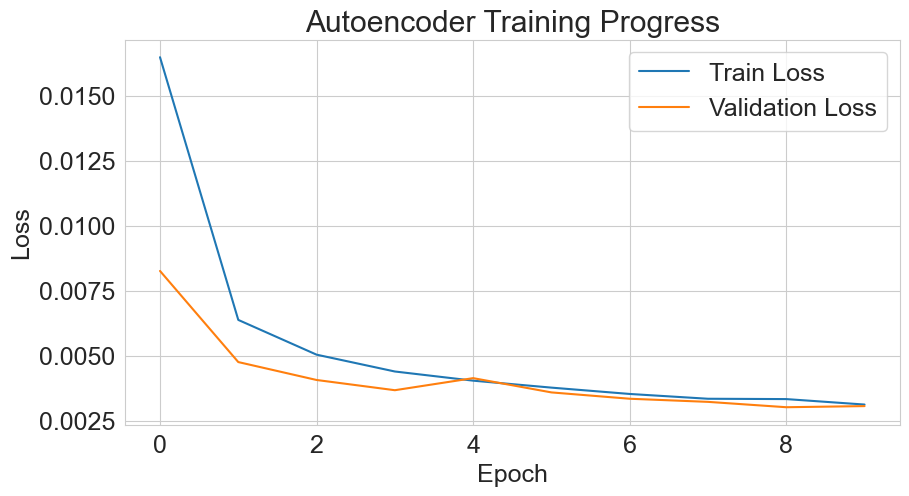

Processing X-ray images: 624it [00:07, 78.83it/s] 
Processing non-X-ray images: 100%|██████████| 12/12 [00:00<00:00, 71.36it/s]


ROC AUC Score: 0.999
Average X-ray reconstruction error: 0.0033
Average non-X-ray reconstruction error: 0.0292


In [5]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import numpy as np
from pathlib import Path
from tqdm import tqdm
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from CXRAutoencoder import AutoencoderDataset, ChestXRayAutoencoder, train_autoencoder, evaluate_image, test_on_external_dataset

# Example usage
if __name__ == "__main__":
    # Train the autoencoder
    model, train_losses, valid_losses = train_autoencoder(train_df, valid_df, num_epochs=10)
    
    # Plot training curves
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(valid_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Autoencoder Training Progress')
    plt.legend()
    plt.show()
    
    # Test on external dataset
    non_xray_dir = "C:\\Users\\tcs\\Pictures\\Screenshots"  # Directory containing non-X-ray images
    roc_auc, xray_errors, non_xray_errors = test_on_external_dataset(model, test_df, non_xray_dir)
    
    print(f"ROC AUC Score: {roc_auc:.3f}")
    print(f"Average X-ray reconstruction error: {np.mean(xray_errors):.4f}")
    print(f"Average non-X-ray reconstruction error: {np.mean(non_xray_errors):.4f}")